In [ ]:
import pandas as pd
import numpy as np
d = pd.read_csv('/content/depression_data.csv')
d = d.dropna()
print(d)

                     Name  Age Marital Status    Education Level  \
0        Christine Barker   31        Married  Bachelor's Degree   
1        Jacqueline Lewis   55        Married        High School   
2          Shannon Church   78        Widowed    Master's Degree   
3          Charles Jordan   58       Divorced    Master's Degree   
4            Michael Rich   18         Single        High School   
...                   ...  ...            ...                ...   
137611  Christopher Adams   56        Married   Associate Degree   
137612     Jeffery Palmer   51       Divorced   Associate Degree   
137613       Pamela Young   38         Single    Master's Degree   
137614     Tammy Cisneros   35         Single        High School   
137615  Jessica Hernandez   29        Married        High School   

        Number of Children Smoking Status Physical Activity Level  \
0                        2     Non-smoker                  Active   
1                        1     Non-smoker    

In [ ]:
d['Marital Status'] = d['Marital Status'].map({
    'Single': 0,
    'Married': 1,
    'Divorced': 2,
    'Widowed': 3
})

d['Smoking Status'] = d['Smoking Status'].map({
    'Non-smoker': 0,
    'Former': 1,
    'Current': 2
})

d['Physical Activity Level'] = d['Physical Activity Level'].map({
    'Sedentary': 0,
    'Moderate': 1,
    'Active': 2
})

d['Alcohol Consumption'] = d['Alcohol Consumption'].map({
    'Low': 0,
    'Moderate': 1,
    'High': 2
})

d['Dietary Habits'] = d['Dietary Habits'].map({
    'Unhealthy': 0,
    'Moderate': 1,
    'Healthy': 2
})

d['Sleep Patterns'] = d['Sleep Patterns'].map({
    'Poor': 0,
    'Fair': 1,
    'Good': 2
})

d['History of Mental Illness'] = d['History of Mental Illness'].map({'Yes': 1, 'No': 0})
d['History of Substance Abuse'] = d['History of Substance Abuse'].map({'Yes': 1, 'No': 0})
d['Family History of Depression'] = d['Family History of Depression'].map({'Yes': 1, 'No': 0})
d['Chronic Medical Conditions'] = d['Chronic Medical Conditions'].map({'Yes': 1, 'No': 0})

d['Employment Status'] = d['Employment Status'].replace({'Employed': 1, 'Unemployed': 0})

name_mapping = {
    'Christine Barker': 0,
    'Jacqueline Lewis': 1,
    'Shannon Church': 2,
    'Charles Jordan': 3,
    'Michael Rich': 4,
    'Sean Miller': 5,
    'Christina Brown': 6,
    'Matthew Jenkins': 7,
    'Gary Faulkner': 8,
    'Joseph Johnson': 9
}
d['Name'] = d['Name'].replace(name_mapping)
# Convert 'Education Level' to string type before using .str.lower()
d['Education Level'] = d['Education Level'].astype(str).str.lower().map({
    "bachelor's degree": 0,
    "high school": 1,
    "master's degree": 2,
    'associate degree': 3
})
print(d)

<ipython-input-2-cc17d843a530>:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['Employment Status'] = d['Employment Status'].replace({'Employed': 1, 'Unemployed': 0})


                     Name  Age  Marital Status  Education Level  \
0                       0   31               1              0.0   
1                       1   55               1              1.0   
2                       2   78               3              2.0   
3                       3   58               2              2.0   
4                       4   18               0              1.0   
...                   ...  ...             ...              ...   
137611  Christopher Adams   56               1              3.0   
137612     Jeffery Palmer   51               2              3.0   
137613       Pamela Young   38               0              2.0   
137614     Tammy Cisneros   35               0              1.0   
137615  Jessica Hernandez   29               1              1.0   

        Number of Children  Smoking Status  Physical Activity Level  \
0                        2               0                        2   
1                        1               0           

In [ ]:
y=d['Chronic Medical Conditions']
print(y)

0         1
1         1
2         0
3         0
4         1
         ..
137611    0
137612    1
137613    1
137614    1
137615    1
Name: Chronic Medical Conditions, Length: 137616, dtype: int64


In [ ]:
x=d.drop(['Chronic Medical Conditions'],axis=1)
x=x[0:10000]
print(x)


                  Name  Age  Marital Status  Education Level  \
0                    0   31               1              0.0   
1                    1   55               1              1.0   
2                    2   78               3              2.0   
3                    3   58               2              2.0   
4                    4   18               0              1.0   
...                ...  ...             ...              ...   
9995   Brooke Sheppard   61               3              0.0   
9996        Maria King   68               1              3.0   
9997      Brandi Allen   34               1              3.0   
9998       Kelly Baker   42               1              0.0   
9999  Heather Gallegos   80               1              0.0   

      Number of Children  Smoking Status  Physical Activity Level  \
0                      2               0                        2   
1                      1               0                        0   
2                      1

In [ ]:

features=d.drop(['Chronic Medical Conditions','Name'],axis=1)
print(features)

        Age  Marital Status  Education Level  Number of Children  \
0        31               1              0.0                   2   
1        55               1              1.0                   1   
2        78               3              2.0                   1   
3        58               2              2.0                   3   
4        18               0              1.0                   0   
...     ...             ...              ...                 ...   
137611   56               1              3.0                   2   
137612   51               2              3.0                   1   
137613   38               0              2.0                   0   
137614   35               0              1.0                   0   
137615   29               1              1.0                   1   

        Smoking Status  Physical Activity Level  Employment Status     Income  \
0                    0                        2                  0   26265.67   
1                    

In [ ]:
features

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression
0,31,1,0.0,2,0,2,0,26265.67,1,1,1,1,0,1
1,55,1,1.0,1,0,0,1,42710.36,2,0,1,1,0,0
2,78,3,2.0,1,0,0,1,125332.79,0,0,2,0,0,1
3,58,2,2.0,3,0,1,0,9992.78,1,1,0,0,0,0
4,18,0,1.0,0,0,0,0,8595.08,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137611,56,1,3.0,2,0,0,1,51134.96,2,0,0,1,0,0
137612,51,2,3.0,1,0,0,1,57633.05,0,0,2,1,0,0
137613,38,0,2.0,0,2,1,1,82307.01,2,0,0,0,1,0
137614,35,0,1.0,0,2,1,1,25816.47,1,1,2,0,0,1


In [ ]:

features.isnull().sum()
features.replace(np.inf, -np.nan, inplace=True)
features.fillna(features.mean(), inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,y,test_size=0.4,random_state=20)

accuracy: 0.6697561447180801


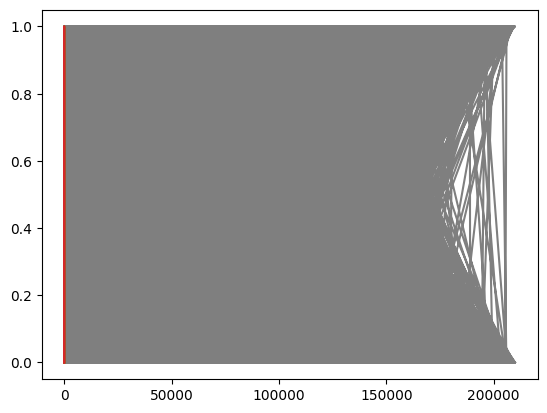

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
model=Perceptron()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)
plt.plot(x_train,y_train)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[110570    481]
 [ 54177    280]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80    111051
           1       0.37      0.01      0.01     54457

    accuracy                           0.67    165508
   macro avg       0.52      0.50      0.41    165508
weighted avg       0.57      0.67      0.54    165508



In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)


accuracy: 0.6709705875244701


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[111051      0]
 [ 54457      0]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80    111051
           1       0.00      0.00      0.00     54457

    accuracy                           0.67    165508
   macro avg       0.34      0.50      0.40    165508
weighted avg       0.45      0.67      0.54    165508



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.6661897949451597


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19558     0]
 [ 9800     0]]


In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     19558
           1       0.00      0.00      0.00      9800

    accuracy                           0.67     29358
   macro avg       0.33      0.50      0.40     29358
weighted avg       0.44      0.67      0.53     29358



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.5999727501873424


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# First, perform SMOTE oversampling on the entire dataset
smote = SMOTE(random_state=20) # Initialize SMOTE with random_state
features_resampled, y_resampled = smote.fit_resample(features, y)

# Then, split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_resampled,
                                                    y_resampled,
                                                    test_size=0.2,
                                                    random_state=20)

In [ ]:
#from imblearn.over_sampling import SMOTE
#smote=SMOTE()
#x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.5143717836073805


In [ ]:
from sklearn.linear_model import Perceptron
model=Perceptron()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.4945085979666123


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[    0 16109]
 [    0 15759]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16109
           1       0.49      1.00      0.66     15759

    accuracy                           0.49     31868
   macro avg       0.25      0.50      0.33     31868
weighted avg       0.24      0.49      0.33     31868



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.6103928705911886


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[10043  6066]
 [ 6350  9409]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.61      0.62      0.62     16109
           1       0.61      0.60      0.60     15759

    accuracy                           0.61     31868
   macro avg       0.61      0.61      0.61     31868
weighted avg       0.61      0.61      0.61     31868



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the model before using it
model = SVC()

# Fit the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[24398     0]
 [12300     0]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     24398
           1       0.00      0.00      0.00     12300

    accuracy                           0.66     36698
   macro avg       0.33      0.50      0.40     36698
weighted avg       0.44      0.66      0.53     36698



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.6012044253092812


In [ ]:
x=features

              precision    recall  f1-score   support

          No       0.67      1.00      0.80     55508
         Yes       1.00      0.00      0.00     27246

    accuracy                           0.67     82754
   macro avg       0.84      0.50      0.40     82754
weighted avg       0.78      0.67      0.54     82754



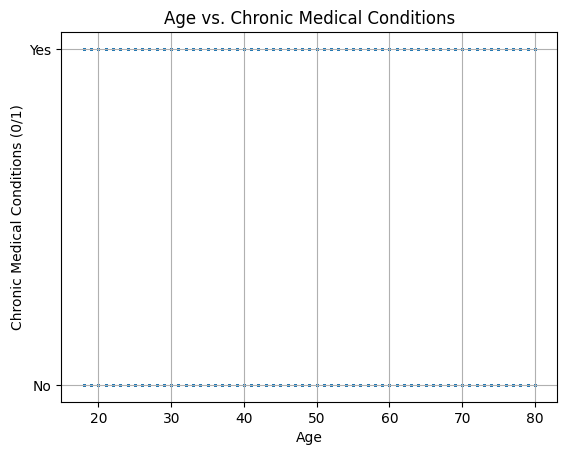

In [ ]:
# Import necessary libraries
#pso
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
!pip install pyswarms
import pyswarms as ps
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('/content/depression_data.csv')
X = data.drop(columns=['Chronic Medical Conditions'])
y = data['Chronic Medical Conditions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for column in X_train.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    all_unique_values = pd.concat([X_train[column], X_test[column]]).unique()
    label_encoder.fit(all_unique_values)
    X_train[column] = label_encoder.transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])
best_n_estimators = 100
best_max_depth = 10
best_min_samples_split = 2
final_model = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    random_state=42
)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000
plt.scatter(X_train['Age'], y_train, marker='.', s=1)
plt.xlabel("Age")
plt.ylabel("Chronic Medical Conditions (0/1)")
plt.title("Age vs. Chronic Medical Conditions")
plt.grid(True)
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

          No       0.67      1.00      0.80     55508
         Yes       0.00      0.00      0.00     27246

    accuracy                           0.67     82754
   macro avg       0.34      0.50      0.40     82754
weighted avg       0.45      0.67      0.54     82754



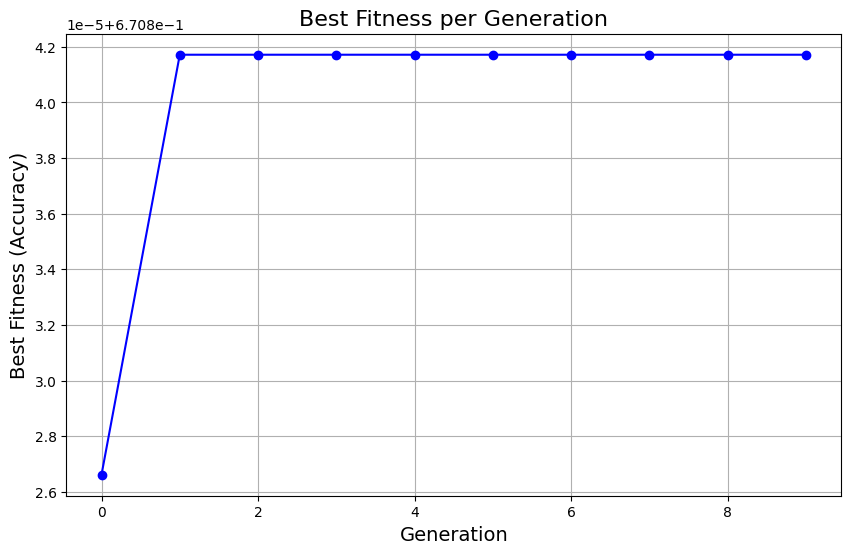

In [ ]:
#genetic alogorithm
import pandas as pd
import numpy as np
!pip install deap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('/content/depression_data.csv')
X = data.drop(columns=['Chronic Medical Conditions'])
y = data['Chronic Medical Conditions']
for column in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def evaluate(individual):
    """Evaluate an individual: [n_estimators, max_depth, min_samples_split]."""
    n_estimators = int(individual[0])
    max_depth = int(individual[1]) if individual[1] > 0 else None
    min_samples_split = int(individual[2])
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return np.mean(scores),
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("n_estimators", np.random.randint, 10, 50)
toolbox.register("max_depth", np.random.randint, 1, 20)
toolbox.register("min_samples_split", np.random.randint, 2, 10)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.n_estimators, toolbox.max_depth, toolbox.min_samples_split))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[10, 1, 2], up=[50, 20, 10], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
population = toolbox.population(n=20)
N_GEN = 10
CXPB, MUTPB = 0.5, 0.2
best_fitness_per_generation = []

for gen in range(N_GEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    best_fitness = max(fit[0] for fit in fits)
    best_fitness_per_generation.append(best_fitness)
best_individual = tools.selBest(population, k=1)[0]
best_n_estimators = int(best_individual[0])
best_max_depth = int(best_individual[1]) if best_individual[1] > 0 else None
best_min_samples_split = int(best_individual[2])
final_model = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    random_state=42
)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_result)
plt.figure(figsize=(10, 6))
plt.plot(range(N_GEN), best_fitness_per_generation, marker='o', linestyle='-', color='b')
plt.title('Best Fitness per Generation', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Best Fitness (Accuracy)', fontsize=14)
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_differentialevolution.py:487: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


Best Parameters Found: [112.57857296   8.93569134   3.05842893   3.71612213]

Classification Report:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          No       0.67      1.00      0.80     83167
         Yes       0.00      0.00      0.00     40964

    accuracy                           0.67    124131
   macro avg       0.33      0.50      0.40    124131
weighted avg       0.45      0.67      0.54    124131



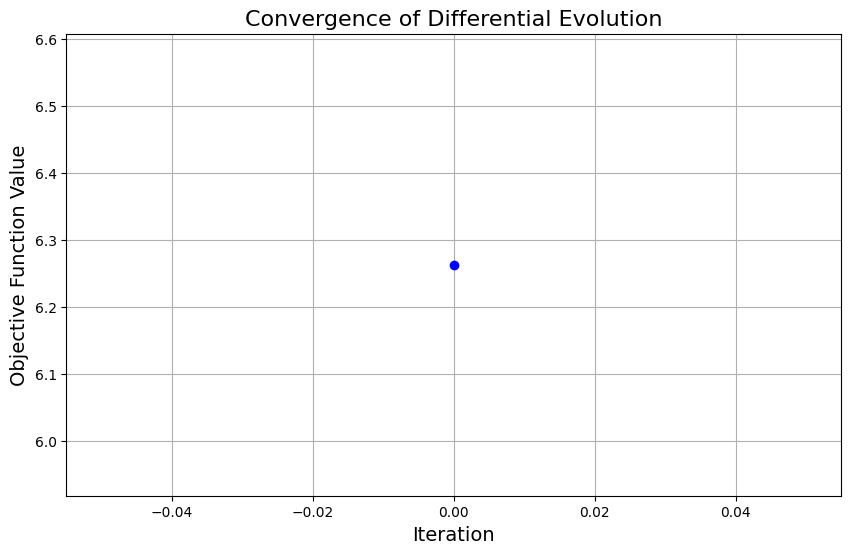

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the data
data = pd.read_csv('/content/depression_data.csv')
X = data.drop(columns=['Chronic Medical Conditions'])
y = data['Chronic Medical Conditions']

# Encode categorical features
for column in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use a smaller sample for optimization
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=42)

# Define the evaluation function
def evaluate_model(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    # Cross-validation on the sampled data
    scores = cross_val_score(model, X_sample, y_sample, cv=2, scoring='accuracy')
    return -np.mean(scores)

# Parameter bounds (tighter ranges for faster optimization)
bounds = [
    (50, 150),  # n_estimators
    (5, 20),    # max_depth
    (2, 10),    # min_samples_split
    (1, 5)
]
convergence = []

def callback(x, convergence_value, context=None):
    convergence.append(convergence_value)
result = differential_evolution(
    evaluate_model,
    bounds,
    strategy='best1bin',
    maxiter=5,
    popsize=10,
    tol=0.01,
    mutation=(0.5, 1),
    recombination=0.7,
    seed=42,
    workers=-1,
    callback=callback
)
best_params = result.x
print("Best Parameters Found:", best_params)
best_model = RandomForestClassifier(
    n_estimators=int(best_params[0]),
    max_depth=int(best_params[1]),
    min_samples_split=int(best_params[2]),
    min_samples_leaf=int(best_params[3]),
    random_state=42
)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10, 6))
plt.plot(convergence, marker='o', linestyle='-', color='b')
plt.title('Convergence of Differential Evolution', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Objective Function Value', fontsize=14)
plt.grid()
plt.show()


Optimization terminated successfully.
         Current function value: 0.691027
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19

=== Newton's Method ===
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.55      0.62     83167
           1       0.36      0.51      0.43     40964

    accuracy                           0.54    124131
   macro avg       0.53      0.53      0.52    124131
weighted avg       0.59      0.54      0.55    124131

Confusion Matrix:
[[46143 37024]
 [19890 21074]]

=== Quasi-Newton (BFGS) ===
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.55      0.62     83167
           1       0.36      0.51      0.43     40964

    accuracy                           0.54    124131
   macro avg       0.53      0.53      0.52    124131
weighted avg       0.59      0.54      0.55    124131

Confusion Matrix:
[[46145

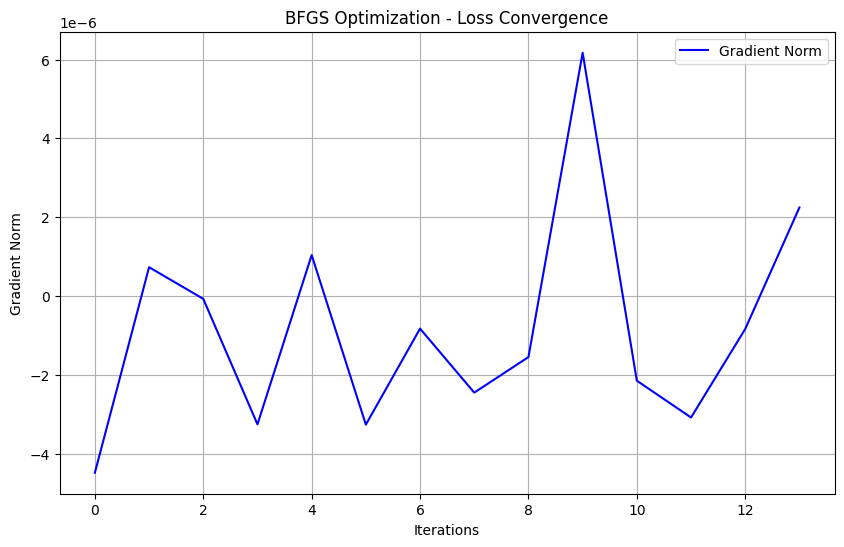

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from scipy.optimize import minimize
import matplotlib.pyplot as plt
file_path = '/content/depression_data.csv'
data = pd.read_csv(file_path)
X = data.drop(columns=['Chronic Medical Conditions', 'Name'], errors='ignore')
y = data['Chronic Medical Conditions']
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])
y = label_encoder.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(w, X, y):
    """
    Compute the log-loss (objective function) for logistic regression.
    """
    z = np.dot(X, w)
    predictions = sigmoid(z)
    return -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))

def gradient(w, X, y):
    """
    Compute the gradient of the log-loss with respect to weights w.
    """
    z = np.dot(X, w)
    predictions = sigmoid(z)
    return np.dot(X.T, (predictions - y)) / len(y)

def hessian(w, X, y):
    """
    Compute the Hessian matrix of the log-loss.
    """
    z = np.dot(X, w)
    predictions = sigmoid(z)
    diag = predictions * (1 - predictions)
    H = np.dot(X.T * diag, X) / len(y)
    return H

# Initial weights
initial_weights = np.zeros(X_train.shape[1])

# Newton's Method for Optimization
def newtons_method(X, y, max_iter=100, tol=1e-6):
    w = initial_weights
    for i in range(max_iter):
        grad = gradient(w, X, y)
        H = hessian(w, X, y)
        step = np.linalg.inv(H).dot(grad)
        w = w - step
        if np.linalg.norm(grad) < tol:
            break
    return w

weights_newton = newtons_method(X_train, y_train)

result_bfgs = minimize(
    fun=log_loss,
    x0=initial_weights,
    args=(X_train, y_train),
    method='BFGS',
    jac=gradient,
    options={'disp': True}
)

def predict(X, weights):
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= 0.5).astype(int)

#  Newton's Method
y_pred_newton = predict(X_test, weights_newton)
print("\n=== Newton's Method ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_newton))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_newton))
y_pred_bfgs = predict(X_test, result_bfgs.x)
print("\n=== Quasi-Newton (BFGS) ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_bfgs))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bfgs))
plt.figure(figsize=(10, 6))
plt.title("BFGS Optimization - Loss Convergence")
plt.plot(result_bfgs.jac, label="Gradient Norm", color='blue')
plt.xlabel("Iterations")
plt.ylabel("Gradient Norm")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# SMO SVM implementation
class SMOSVM:
    def __init__(self, C=1.0, tol=1e-3, max_iter=100):
        self.C = C
        self.tol = tol
        self.max_iter = max_iter
        self.alphas = None
        self.b = 0
        self.X = None
        self.y = None

    def kernel_function(self, x1, x2):
        return np.dot(x1, x2)

    def fit(self, X, y):
        self.X = X
        self.y = y
        n_samples, n_features = X.shape
        self.alphas = np.zeros(n_samples)

        iter_count = 0
        while iter_count < self.max_iter:
            alpha_pairs_changed = 0
            for i in range(n_samples):
                Ei = self._decision_function(self.X[i]) - self.y[i]
                if (self.y[i] * Ei < -self.tol and self.alphas[i] < self.C) or (self.y[i] * Ei > self.tol and self.alphas[i] > 0):
                    j = self._select_second_alpha(i, n_samples)
                    Ej = self._decision_function(self.X[j]) - self.y[j]

                    alpha_i_old, alpha_j_old = self.alphas[i], self.alphas[j]
                    if self.y[i] != self.y[j]:
                        L, H = max(0, alpha_j_old - alpha_i_old), min(self.C, self.C + alpha_j_old - alpha_i_old)
                    else:
                        L, H = max(0, alpha_i_old + alpha_j_old - self.C), min(self.C, alpha_i_old + alpha_j_old)

                    if L == H:
                        continue

                    eta = 2 * self.kernel_function(self.X[i], self.X[j]) - self.kernel_function(self.X[i], self.X[i]) - self.kernel_function(self.X[j], self.X[j])
                    if eta >= 0:
                        continue

                    self.alphas[j] -= self.y[j] * (Ei - Ej) / eta
                    self.alphas[j] = np.clip(self.alphas[j], L, H)
                    self.alphas[i] += self.y[i] * self.y[j] * (alpha_j_old - self.alphas[j])

                    b1 = self.b - Ei - \
                         self.y[i] * (self.alphas[i] - alpha_i_old) * self.kernel_function(self.X[i], self.X[i]) - \
                         self.y[j] * (self.alphas[j] - alpha_j_old) * self.kernel_function(self.X[i], self.X[j])
                    b2 = self.b - Ej - \
                         self.y[i] * (self.alphas[i] - alpha_i_old) * self.kernel_function(self.X[i], self.X[j]) - \
                         self.y[j] * (self.alphas[j] - alpha_j_old) * self.kernel_function(self.X[j], self.X[j])
                    self.b = b1 if 0 < self.alphas[i] < self.C else (b2 if 0 < self.alphas[j] < self.C else (b1 + b2) / 2)

                    alpha_pairs_changed += 1

            if alpha_pairs_changed == 0:
                break
            iter_count += 1

    def _decision_function(self, X):
        return np.dot(self.alphas * self.y, self.kernel_function(self.X, X)) + self.b

    def _select_second_alpha(self, i, n_samples):
        j = i
        while j == i:
            j = np.random.randint(0, n_samples)
        return j

    def predict(self, X):
        return np.sign(self._decision_function(X))

# Load and preprocess dataset
data = pd.read_csv('/content/depression_data.csv')  # Ensure this path is correct
X = data.drop(columns=['Chronic Medical Conditions', 'Name'], errors='ignore')
y = data['Chronic Medical Conditions'].map({'Yes': 1, 'No': -1}).values

# Encode categorical features
for column in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column])

# Impute missing values before scaling
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of the column
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train SMO SVM with reduced iterations
svm = SMOSVM(C=1.0, tol=1e-3, max_iter=100)  # Reduced iterations
svm.fit(X_pca, y)

# Predictions and evaluation
y_pred = svm.predict(X_pca)
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# Visualize decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("SVM Decision Boundary with Support Vectors")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


NameError: name 'X_pca' is not defined

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          No       0.67      1.00      0.80     83167
         Yes       0.00      0.00      0.00     40964

    accuracy                           0.67    124131
   macro avg       0.33      0.50      0.40    124131
weighted avg       0.45      0.67      0.54    124131

Confusion Matrix:
[[83167     0]
 [40964     0]]


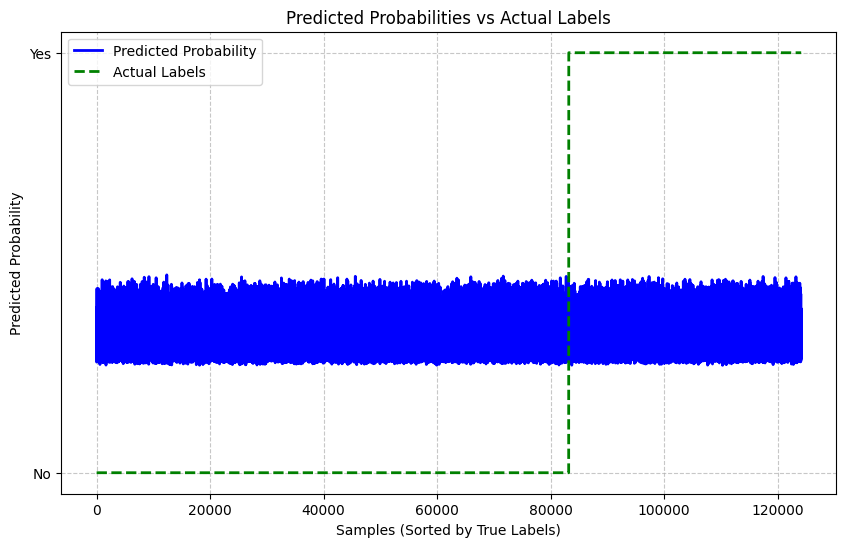

Skipping decision boundary plot as data is not 2D.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Load dataset
data = pd.read_csv('/content/depression_data.csv')

# Drop unnecessary columns and encode categorical features
X = data.drop(columns=['Chronic Medical Conditions', 'Name'])  # Drop 'Name' column
y = data['Chronic Medical Conditions']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate through columns and encode object (string) type columns
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot predicted probabilities as a line graph
sorted_indices = np.argsort(y_test)
sorted_probs = y_prob[sorted_indices]
sorted_y_test = y_test.values[sorted_indices]

plt.figure(figsize=(10, 6))
plt.plot(sorted_probs, label="Predicted Probability", color='blue', linewidth=2)
plt.plot(sorted_y_test, label="Actual Labels", color='green', linestyle='--', linewidth=2)
plt.title("Predicted Probabilities vs Actual Labels")
plt.xlabel("Samples (Sorted by True Labels)")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Decision boundary as a line (2D data only)
if X.shape[1] == 2:  # Only for datasets with 2 features
    coef = model.coef_[0]
    intercept = model.intercept_[0]

    # Line equation: y = -(w1/w2) * x - (intercept / w2)
    x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
    y_vals = -(coef[0] / coef[1]) * x_vals - (intercept / coef[1])

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', label="Training Data")
    plt.plot(x_vals, y_vals, color='red', label="Decision Boundary", linewidth=2)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1 (e.g., Age)")
    plt.ylabel("Feature 2 (e.g., Income)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("Skipping decision boundary plot as data is not 2D.")


Training the Random Forest model...

Classification Report:
              precision    recall  f1-score   support

          No       0.67      0.88      0.76     83167
         Yes       0.34      0.13      0.19     40964

    accuracy                           0.63    124131
   macro avg       0.51      0.50      0.47    124131
weighted avg       0.56      0.63      0.57    124131


Confusion Matrix:
[[73015 10152]
 [35645  5319]]

Plotting feature importances...


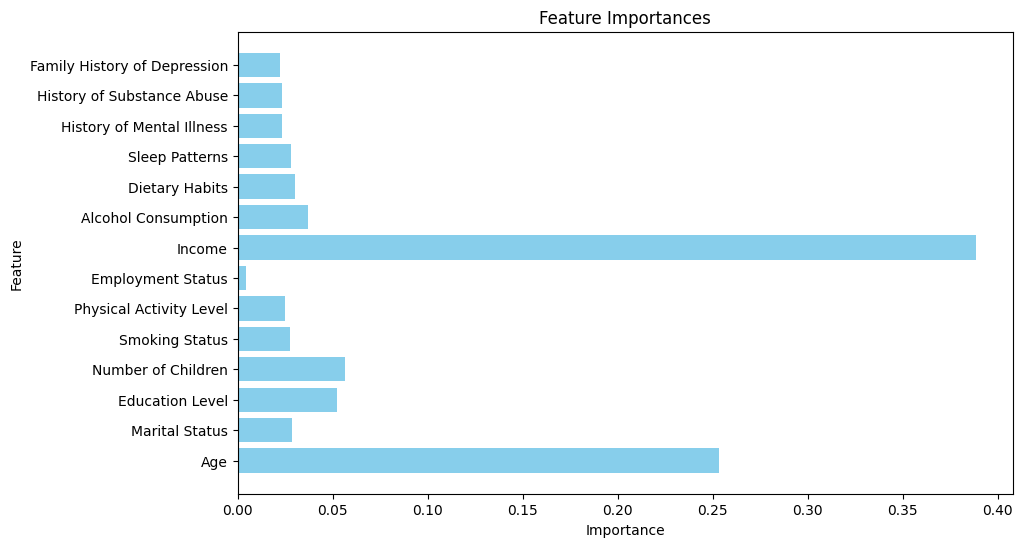

Skipping decision boundary plot as data is not 2D.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
data = pd.read_csv('/content/depression_data.csv')

# Preprocessing
# Assuming 'Name' is irrelevant for prediction and 'Chronic Medical Conditions' is the target
X = data.drop(columns=['Chronic Medical Conditions', 'Name'])  # Drop irrelevant columns
y = data['Chronic Medical Conditions']

# Encode categorical features
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Training the Random Forest model...")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance visualization
print("\nPlotting feature importances...")
feature_importances = model.feature_importances_
feature_names = data.drop(columns=['Chronic Medical Conditions', 'Name']).columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# If the dataset is 2D, visualize decision boundary
if X.shape[1] == 2:  # Only plot if features are 2D
    print("\nPlotting decision boundary...")
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    print("Skipping decision boundary plot as data is not 2D.")


Iteration 0, Loss: 0.32883574957619366
Iteration 100, Loss: 0.32883574957619366
Iteration 200, Loss: 0.32883574957619366
Iteration 300, Loss: 0.32883574957619366
Iteration 400, Loss: 0.32883574957619366
Iteration 500, Loss: 0.32883574957619366
Iteration 600, Loss: 0.32883574957619366
Iteration 700, Loss: 0.32883574957619366
Iteration 800, Loss: 0.32883574957619366
Iteration 900, Loss: 0.32883574957619366
Classification Report (PGD):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80     83167
           1       0.00      0.00      0.00     40964

    accuracy                           0.67    124131
   macro avg       0.33      0.50      0.40    124131
weighted avg       0.45      0.67      0.54    124131

Confusion Matrix (PGD):
[[83167     0]
 [40964     0]]


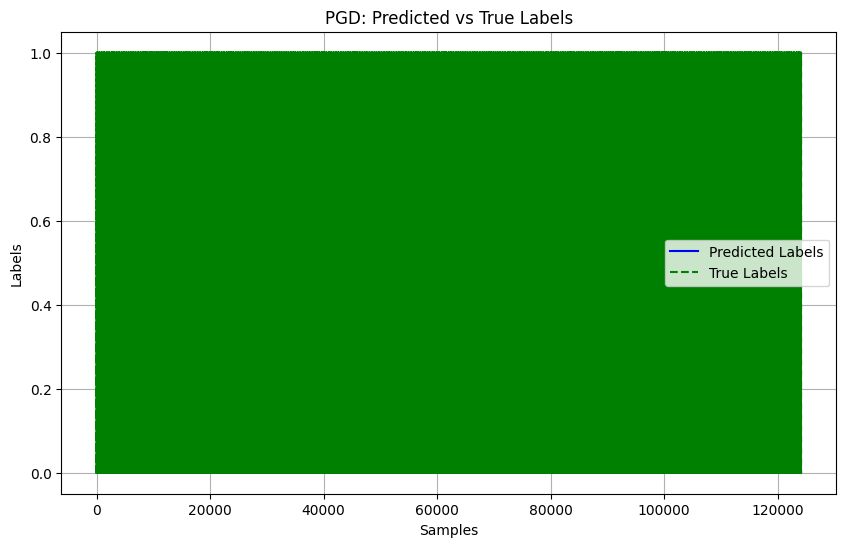

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv('/content/depression_data.csv')

# Drop unnecessary columns and encode categorical features
X = data.drop(columns=['Chronic Medical Conditions', 'Name'])  # Drop 'Name' column
y = data['Chronic Medical Conditions']

# Ensure all columns in X are numeric
# Create a LabelEncoder instance to handle categorical variables
label_encoder = LabelEncoder()

# Encode categorical features to numeric values
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Ensure that y is numeric (if it's categorical)
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Proximal Gradient Descent for Lasso Regression
def proximal_gradient_descent(X, y, lambda_reg=0.1, max_iter=1000, learning_rate=0.01):
    # Initialize weights
    n, m = X.shape
    w = np.zeros(m)
    for iteration in range(max_iter):
        # Compute the gradient (derivative of least squares loss)
        gradient = -2 * X.T.dot(y - X.dot(w)) / n

        # Update the weights using gradient descent
        w -= learning_rate * gradient

        # Apply the soft-thresholding operator (proximal operator for L1 regularization)
        w = np.sign(w) * np.maximum(0, np.abs(w) - lambda_reg * learning_rate)

        # Optionally: Monitor the objective function
        if iteration % 100 == 0:
            loss = mean_squared_error(y, X.dot(w)) + lambda_reg * np.sum(np.abs(w))  # Lasso loss
            print(f"Iteration {iteration}, Loss: {loss}")

    return w

# Train model using Proximal Gradient Descent
lambda_reg = 0.1  # Regularization strength
w_pgd = proximal_gradient_descent(X_train, y_train, lambda_reg=lambda_reg)

# Predictions
y_pred_pgd = np.sign(X_test.dot(w_pgd))

# Classification report
print("Classification Report (PGD):")
print(classification_report(y_test, y_pred_pgd))

# Confusion matrix
print("Confusion Matrix (PGD):")
print(confusion_matrix(y_test, y_pred_pgd))

# Plot the results (PGD)
plt.figure(figsize=(10, 6))
plt.plot(y_pred_pgd, label="Predicted Labels", color='blue')
plt.plot(y_test, label="True Labels", color='green', linestyle='--')
plt.title("PGD: Predicted vs True Labels")
plt.xlabel("Samples")
plt.ylabel("Labels")
plt.legend()
plt.grid(True)
plt.show()


Converged at iteration 0
Classification Report (ADMM):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00     83167
         1.0       0.36      0.52      0.43     40964

    accuracy                           0.17    124131
   macro avg       0.12      0.17      0.14    124131
weighted avg       0.12      0.17      0.14    124131

Confusion Matrix (ADMM):
[[    0     0     0]
 [45975     0 37192]
 [19842     0 21122]]


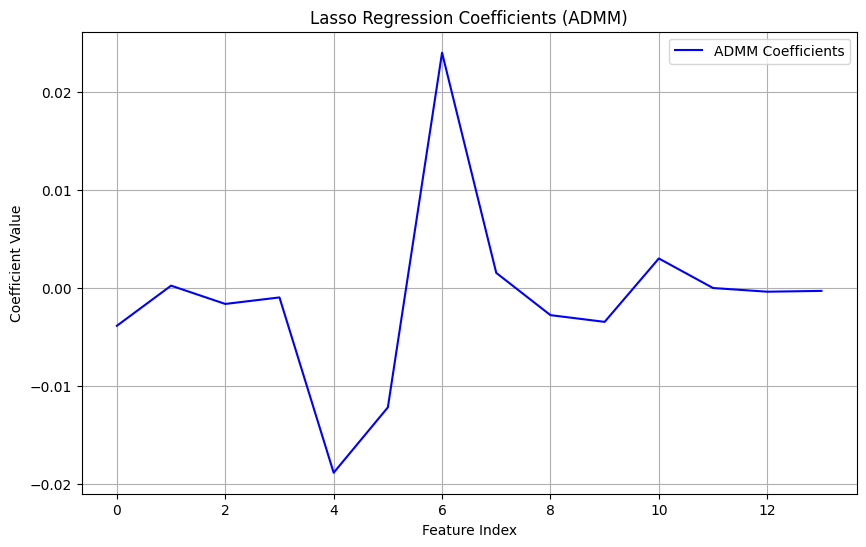

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# ADMM for Lasso Regression
def admm_lasso(X, y, lambda_reg=0.1, rho=1.0, max_iter=1000, tol=1e-6):
    n, m = X.shape
    w = np.zeros(m)
    z = np.zeros(m)
    u = np.zeros(m)

    # Precompute X'X
    XtX = np.dot(X.T, X)
    XtY = np.dot(X.T, y)

    for i in range(max_iter):
        # Update w: solve (X'X + rho*I)w = XtY + rho*(z - u)
        w = np.linalg.solve(XtX + rho * np.eye(m), XtY + rho * (z - u))

        # Update z with soft-thresholding
        z_old = z.copy()
        z = np.sign(w + u) * np.maximum(0, np.abs(w + u) - lambda_reg / rho)

        # Update dual variable u
        u += w - z

        # Check for convergence (stop if change is small)
        if np.linalg.norm(z - z_old) < tol:
            print(f"Converged at iteration {i}")
            break

    return w, z

# Load dataset
data = pd.read_csv('/content/depression_data.csv')

# Drop unnecessary columns and encode categorical features
X = data.drop(columns=['Chronic Medical Conditions', 'Name'])  # Drop 'Name' column
y = data['Chronic Medical Conditions']

# Ensure all columns in X are numeric
label_encoder = LabelEncoder()

# Encode categorical features to numeric values
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Encode target variable if necessary
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply ADMM for Lasso Regression
lambda_reg = 0.1  # Regularization strength
rho = 1.0         # Augmented Lagrangian parameter
w_admm, z_admm = admm_lasso(X_train, y_train, lambda_reg, rho)

# Predictions
y_pred = np.sign(np.dot(X_test, w_admm))

# Classification report
print("Classification Report (ADMM):")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix (ADMM):")
print(confusion_matrix(y_test, y_pred))

# Plot the coefficients (sparsity of the solution)
plt.figure(figsize=(10, 6))
plt.plot(w_admm, label="ADMM Coefficients", color='blue')
plt.title("Lasso Regression Coefficients (ADMM)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Simulated Annealing for Feature Selection
class SimulatedAnnealing:
    def __init__(self, X_train, y_train, n_iterations=5, initial_temp=1000, cooling_rate=0.95):
        self.X_train = X_train
        self.y_train = y_train
        self.n_iterations = n_iterations
        self.initial_temp = initial_temp
        self.cooling_rate = cooling_rate

    def _evaluate_solution(self, solution):
        # Select features based on the solution
        selected_features = np.where(solution == 1)[0]

        # Check for empty feature set
        if len(selected_features) == 0:
            return float('inf')  # Penalize empty feature set

        # Subset features
        X_selected = self.X_train[:, selected_features]

        try:
            # Train and evaluate an SVM
            model = SVC(C=1.0, kernel='linear', random_state=42)
            model.fit(X_selected, self.y_train)
            return -model.score(X_selected, self.y_train)  # Minimize negative accuracy
        except Exception as e:
            print(f"Error during evaluation: {e}")
            return float('inf')  # Penalize invalid solutions

    def _get_neighbor(self, solution):
        # Generate a neighbor by flipping one bit in the solution
        neighbor = solution.copy()
        flip_index = np.random.randint(0, len(solution))
        neighbor[flip_index] = 1 - neighbor[flip_index]  # Flip the feature selection
        return neighbor

    def optimize(self):
        n_features = self.X_train.shape[1]
        current_solution = np.random.randint(2, size=n_features)  # Random initial solution
        current_fitness = self._evaluate_solution(current_solution)
        best_solution = current_solution.copy()
        best_fitness = current_fitness

        temperature = self.initial_temp
        fitness_history = []
        temperature_history = []

        for iteration in range(self.n_iterations):
            neighbor_solution = self._get_neighbor(current_solution)
            neighbor_fitness = self._evaluate_solution(neighbor_solution)

            # Simulated Annealing Acceptance Criteria
            if neighbor_fitness < current_fitness or np.random.rand() < np.exp((current_fitness - neighbor_fitness) / temperature):
                current_solution = neighbor_solution
                current_fitness = neighbor_fitness

            # Update the best solution
            if current_fitness < best_fitness:
                best_fitness = current_fitness
                best_solution = current_solution.copy()

            # Cool down the temperature
            temperature *= self.cooling_rate

            # Store fitness and temperature for visualization
            fitness_history.append(-best_fitness)  # Convert back to positive accuracy
            temperature_history.append(temperature)

            print(f"Iteration {iteration + 1}, Best Fitness: {fitness_history[-1]:.4f}, Temperature: {temperature:.4f}")

        return best_solution, best_fitness, fitness_history, temperature_history

# Load dataset
data = pd.read_csv('/content/depression_data.csv')  # Update with the correct path

# Preprocessing
X = data.drop(columns=['Chronic Medical Conditions', 'Name'], errors='ignore')  # Drop irrelevant columns
y = data['Chronic Medical Conditions']

# Encode categorical features
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Encode target variable
y = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Run Simulated Annealing
sa = SimulatedAnnealing(X_train, y_train, n_iterations=50, initial_temp=1000, cooling_rate=0.95)
best_solution, best_fitness, fitness_history, temperature_history = sa.optimize()

# Get selected features
selected_features = np.where(best_solution == 1)[0]
print("\nSelected Features by Simulated Annealing:", selected_features)

# Select features for training and testing
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train SVM with selected features
model = SVC(C=1.0, kernel='linear', random_state=42)
model.fit(X_train_selected, y_train)

# Evaluate model
y_pred = model.predict(X_test_selected)

# Classification Report and Confusion Matrix
print("\nClassification Report (Simulated Annealing):")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix (Simulated Annealing):")
print(confusion_matrix(y_test, y_pred))

# Visualization - Fitness History
plt.figure(figsize=(12, 6))
plt.plot(fitness_history, marker='o', linestyle='-', color='blue', label='Best Fitness')
plt.title("Simulated Annealing - Fitness Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Fitness (Accuracy)")
plt.legend()
plt.grid(True)
plt.show()

# Visualization - Temperature Decay
plt.figure(figsize=(12, 6))
plt.plot(temperature_history, marker='o', linestyle='-', color='red', label='Temperature Decay')
plt.title("Simulated Annealing - Temperature Decay Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()


Iteration 1, Best Fitness: -inf
Iteration 2, Best Fitness: -inf
Iteration 3, Best Fitness: 0.7257142857142858
Iteration 4, Best Fitness: 0.7257142857142858
Iteration 5, Best Fitness: 0.7257142857142858

Selected Features by ACO: [11 12]

Classification Report (ACO):
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        95
           1       0.00      0.00      0.00        55

    accuracy                           0.63       150
   macro avg       0.32      0.50      0.39       150
weighted avg       0.40      0.63      0.49       150


Confusion Matrix (ACO):
[[95  0]
 [55  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


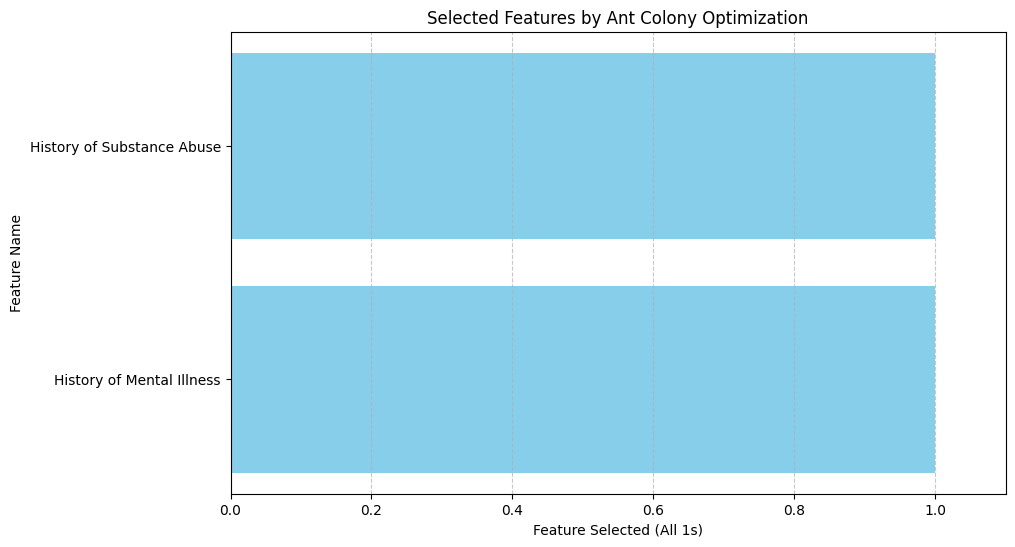


Classification Report (SelectKBest):
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        95
           1       0.00      0.00      0.00        55

    accuracy                           0.63       150
   macro avg       0.32      0.50      0.39       150
weighted avg       0.40      0.63      0.49       150


Confusion Matrix (SelectKBest):
[[95  0]
 [55  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Load dataset
data = pd.read_csv('/content/depression_data.csv')

# Reduce dataset size for quicker testing (optional)
data = data.sample(n=500)  # Test with 500 rows for faster feedback

# Preprocessing
X = data.drop(columns=['Chronic Medical Conditions', 'Name'])  # Drop irrelevant columns
y = data['Chronic Medical Conditions']

# Encode categorical features
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Encode target variable
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ant Colony Optimization (Reduced Iterations and Ants)
class AntColonyOptimization:
    def __init__(self, X_train, y_train, n_ants=2, n_iterations=5, alpha=1, beta=1, rho=0.9, q0=0.5):
        self.X_train = X_train
        self.y_train = y_train
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha  # Pheromone importance
        self.beta = beta    # Heuristic importance
        self.rho = rho      # Pheromone evaporation rate
        self.q0 = q0        # Probability of exploitation

    def _initialize_pheromones(self, n_features):
        return np.ones(n_features)

    def _construct_solution(self, pheromones):
        n_features = len(pheromones)
        solution = np.zeros(n_features)
        for i in range(n_features):
            prob = pheromones[i] ** self.alpha
            prob /= np.sum(pheromones ** self.alpha)
            if np.random.rand() < prob:
                solution[i] = 1
        return solution

    def evaluate_solution_parallel(self, solution):
        selected_features = np.where(solution == 1)[0]
        if len(selected_features) == 0:
            return float('inf')  # High cost for empty feature set

        X_selected = self.X_train[:, selected_features]
        model = SVC(C=1.0, kernel='linear', random_state=42)
        model.fit(X_selected, self.y_train)
        return -model.score(X_selected, self.y_train)  # Minimize negative accuracy

    def _update_pheromones(self, pheromones, solutions, fitnesses):
        pheromones *= self.rho  # Evaporate pheromones
        for solution, fitness in zip(solutions, fitnesses):
            pheromone_update = 1 / (1 + fitness)
            for i, selected in enumerate(solution):
                if selected == 1:
                    pheromones[i] += pheromone_update
        return pheromones

    def optimize(self):
        n_features = self.X_train.shape[1]
        pheromones = self._initialize_pheromones(n_features)
        best_solution = None
        best_fitness = float('inf')

        for iteration in range(self.n_iterations):
            solutions = [self._construct_solution(pheromones) for _ in range(self.n_ants)]
            fitnesses = [self.evaluate_solution_parallel(solution) for solution in solutions]

            for solution, fitness in zip(solutions, fitnesses):
                if fitness < best_fitness:
                    best_fitness = fitness
                    best_solution = solution

            pheromones = self._update_pheromones(pheromones, solutions, fitnesses)
            print(f"Iteration {iteration + 1}, Best Fitness: {-best_fitness}")

        return best_solution, best_fitness

# Run ACO for feature selection with reduced ants and iterations
aco = AntColonyOptimization(X_train, y_train, n_ants=2, n_iterations=5)
best_solution, best_fitness = aco.optimize()

# Get selected features from ACO
selected_features = np.where(best_solution == 1)[0]
print("\nSelected Features by ACO:", selected_features)

# Select the best features based on ACO results
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train SVM with selected features
model = SVC(C=1.0, kernel='linear', random_state=42)
model.fit(X_train_selected, y_train)

# Predictions
y_pred = model.predict(X_test_selected)

# Classification Report
print("\nClassification Report (ACO):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix (ACO):")
print(confusion_matrix(y_test, y_pred))

# Visualize the selected features as bars
feature_names = data.drop(columns=['Chronic Medical Conditions', 'Name']).columns
selected_feature_names = feature_names[selected_features]

# Plotting the selected features as a bar chart
plt.figure(figsize=(10, 6))

# Create a bar plot where each bar represents a selected feature (height = 1)
plt.barh(selected_feature_names, np.ones(len(selected_feature_names)), color='skyblue')

# Title and labels for the chart
plt.title("Selected Features by Ant Colony Optimization")
plt.xlabel("Feature Selected (All 1s)")
plt.ylabel("Feature Name")

# Customize the x-axis to show the count of 1s (indicating the feature was selected)
plt.xlim(0, 1.1)  # The range goes from 0 to 1 since we're plotting binary selection (1 means selected)

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Optionally use SelectKBest for comparison
kbest = SelectKBest(f_classif, k=5)  # Select top 5 features
X_train_selected_kbest = kbest.fit_transform(X_train, y_train)
X_test_selected_kbest = kbest.transform(X_test)

# Train SVM with selected features from SelectKBest
model_kbest = SVC(C=1.0, kernel='linear', random_state=42)
model_kbest.fit(X_train_selected_kbest, y_train)

# Predictions with SelectKBest features
y_pred_kbest = model_kbest.predict(X_test_selected_kbest)

# Classification Report and Confusion Matrix for SelectKBest
print("\nClassification Report (SelectKBest):")
print(classification_report(y_test, y_pred_kbest))

print("\nConfusion Matrix (SelectKBest):")
print(confusion_matrix(y_test, y_pred_kbest))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80     83167
           1       0.00      0.00      0.00     40964

    accuracy                           0.67    124131
   macro avg       0.33      0.50      0.40    124131
weighted avg       0.45      0.67      0.54    124131



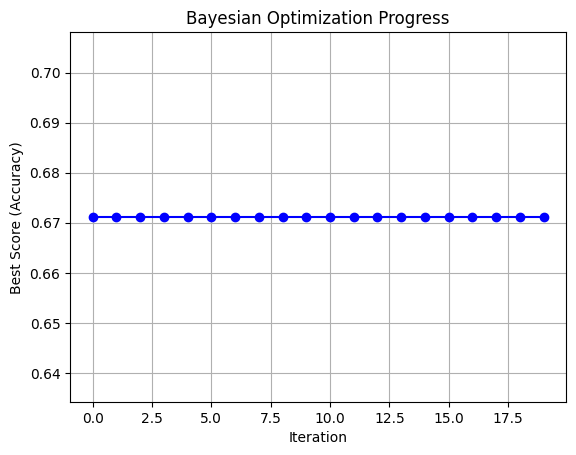

In [ ]:
!pip install scikit-optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical # Import Categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler

# Step 1: Load your dataset
df = pd.read_csv('/content/depression_data.csv')
#Bayesian Optimization
# Step 2: Preprocess the data
# Assume the last column is the target and the rest are features
# If target is categorical, use LabelEncoder (you might need to adjust based on your actual dataset)

# Example: Encoding the target variable if it's categorical
encoder = LabelEncoder()
y = encoder.fit_transform(df['Chronic Medical Conditions'])  # Assuming 'Chronic Medical Conditions' is the target variable
X = df.drop(columns=['Chronic Medical Conditions', 'Name']) # All other columns as features, drop 'Name'

# Handle missing values (if any) - Replace with mean for numerical features
for col in X.select_dtypes(include=np.number).columns:
    X[col] = X[col].fillna(X[col].mean())

# Encode categorical features
for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col])

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Define the parameter space for Bayesian Optimization
param_space = {
    'alpha': Real(1e-5, 1.0, prior='uniform'),  # Regularization term alpha
    'learning_rate': Categorical(['invscaling', 'adaptive']),  # Learning rate for SGD, remove 'optimal' and 'constant'
    'eta0': Real(1e-5, 1.0, prior='uniform'), # Explicitly define eta0 to ensure it's > 0
    'max_iter': Integer(100, 1000),  # Maximum number of iterations
}

# Step 5: Create the SGDClassifier model
clf = SGDClassifier(random_state=42, tol=1e-3)

# Step 6: Perform Bayesian Optimization using BayesSearchCV
opt = BayesSearchCV(clf, param_space, n_iter=20, cv=3, random_state=42, verbose=1, n_jobs=-1)

# Fit the model with Bayesian Optimization
opt.fit(X_train, y_train)

# Step 7: Print the best hyperparameters found by Bayesian Optimization
print(f"Best hyperparameters: {opt.best_params_}")

# Step 8: Train the best model
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)

# Step 9: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Plot Evolutionary Progress (iteration vs best score)
plt.plot(opt.cv_results_['mean_test_score'], marker='o', linestyle='-', color='b')  # Line with markers
plt.title("Bayesian Optimization Progress")
plt.xlabel("Iteration")
plt.ylabel("Best Score (Accuracy)")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import uniform

# Load your dataset
df = pd.read_csv('/content/depression_data.csv')

# Step 1: Preprocess the data
encoder = LabelEncoder()
y = encoder.fit_transform(df['Chronic Medical Conditions'])  # Assuming this is the target variable

# Drop 'Name' column and any other irrelevant columns before scaling
X = df.drop(columns=['Chronic Medical Conditions', 'Name'])  # All other columns as features

# Encode categorical features before scaling
for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col])  # Encode categorical features to numeric

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply scaling after encoding

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Define the parameter space for SVM optimization
param_grid = {
    'C': np.logspace(-5, 5, 11),  # Range for regularization parameter
    'max_iter': [1000, 2000, 3000, 4000],  # Maximum iterations
    'tol': [1e-3, 1e-4, 1e-5],  # Stopping criterion tolerance
}

# Step 3: Initialize the LinearSVC model
svm_model = LinearSVC(random_state=42)

# Step 4: Perform GridSearchCV for hyperparameter optimization
grid_search = GridSearchCV(svm_model, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Step 5: Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Step 6: Evaluate the best model found by GridSearchCV
print(f"Best hyperparameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Step 7: Print the Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize Optimization Progress (for GridSearchCV)
results = grid_search.cv_results_

# Plot the performance of the grid search
mean_test_scores = results['mean_test_score']
plt.plot(mean_test_scores, marker='o', linestyle='-', color='b')
plt.title("SVM Hyperparameter Tuning Progress (GridSearchCV)")
plt.xlabel("Grid Search Iteration")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

# Step 9: Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Fitting 3 folds for each of 132 candidates, totalling 396 fits


KeyboardInterrupt: 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters: {'C': 0.1, 'max_iter': 1000, 'tol': 0.001}
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.56      0.62     83167
           1       0.36      0.51      0.42     40964

    accuracy                           0.54    124131
   macro avg       0.53      0.53      0.52    124131
weighted avg       0.59      0.54      0.56    124131



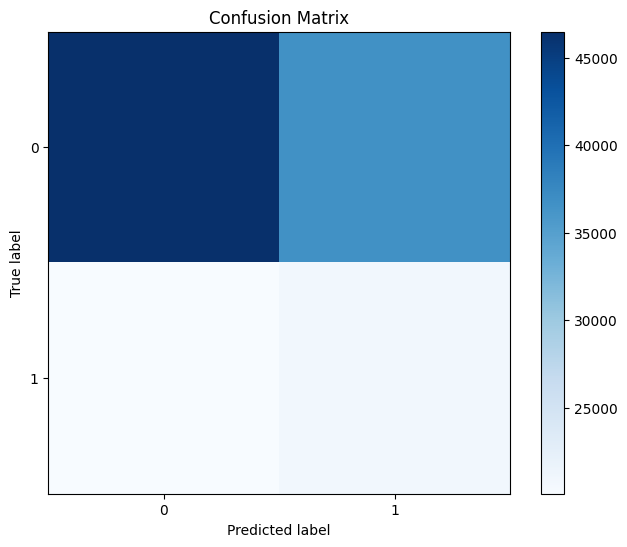

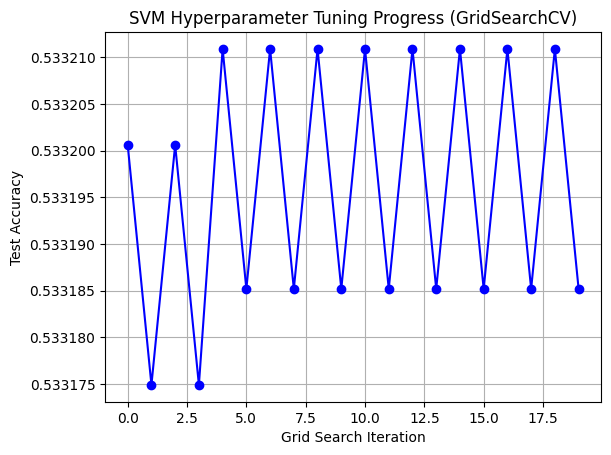

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE  # SMOTE for over-sampling minority class
from sklearn.utils.class_weight import compute_class_weight

# Load your dataset
df = pd.read_csv('/content/depression_data.csv')

# Step 1: Preprocess the data
# Assume the last column is the target and the rest are features
encoder = LabelEncoder()
y = encoder.fit_transform(df.iloc[:, -1])  # Assuming last column is the target variable

# All other columns as features EXCEPT 'Name' (and potentially other irrelevant columns)
X = df.drop(columns=['Chronic Medical Conditions', 'Name']) # Drop 'Name' column

# Convert all object type columns (like categorical columns) to numeric using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col])

# Standardize the data (after dropping or encoding string columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ... (Rest of your code remains the same) ...

# Step 2: Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Compute class weights for handling imbalance (Optional if you use class_weight='balanced' in SVM)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = dict(zip(np.unique(y_train_resampled), class_weights))

# Step 4: Define a parameter grid for hyperparameter optimization
param_grid = {
    'C': np.logspace(-2, 2, 5),  # Regularization parameter
    'max_iter': [1000, 2000],  # Maximum iterations
    'tol': [1e-3, 1e-4],  # Tolerance for stopping criteria
}

# Step 5: Initialize the LinearSVC model with class weights
svm_model = LinearSVC(class_weight=class_weight_dict, random_state=42)

# Step 6: Perform GridSearchCV for hyperparameter optimization with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Step 7: Fit the model using GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Step 8: Evaluate the best model found by GridSearchCV
print(f"Best hyperparameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Step 9: Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Step 10: Print the Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 11: Confusion Matrix to visualize class predictions
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.show()

# Step 12: Visualize the GridSearchCV results
results = grid_search.cv_results_

# Plot the performance of the grid search
mean_test_scores = results['mean_test_score']
plt.plot(mean_test_scores, marker='o', linestyle='-', color='b')
plt.title("SVM Hyperparameter Tuning Progress (GridSearchCV)")
plt.xlabel("Grid Search Iteration")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       147
           1       0.99      0.84      0.91       153

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



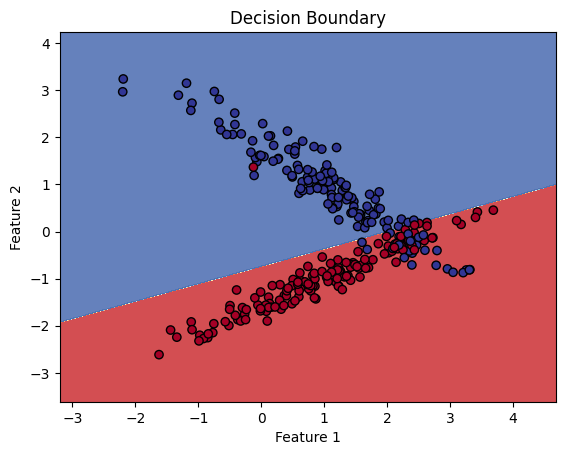

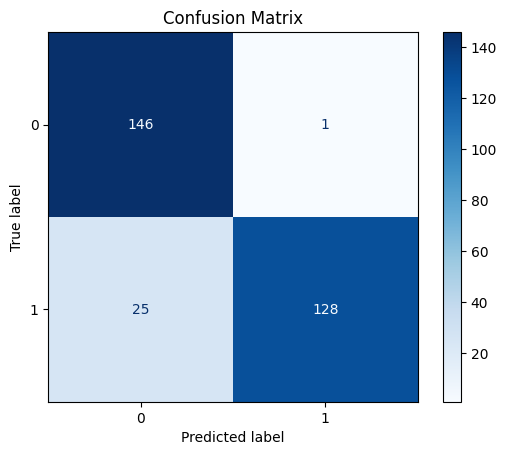

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.optimize import differential_evolution

# Step 1: Create a synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Define SGD and optimization process
def evaluate_sgd(params):
    alpha, tol = params
    model = SGDClassifier(alpha=alpha, tol=tol, random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return -accuracy_score(y_test, y_pred)  # Negative because we minimize in differential evolution

# Bounds for alpha and tol
bounds = [(1e-5, 1e-2), (1e-5, 1e-1)]

# Perform differential evolution
result = differential_evolution(evaluate_sgd, bounds, strategy='best1bin', maxiter=10, seed=42)

# Best parameters
best_alpha, best_tol = result.x

# Train SGD with optimized parameters
best_model = SGDClassifier(alpha=best_alpha, tol=best_tol, random_state=42, max_iter=1000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Step 3: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(best_model, X_test, y_test)

# Step 5: Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=efd7908c95f7c656b2fbea60ba433b59874a118065bec14f18c65d2c19f0e857
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm
Stopping search: maximum iterations reached --> 10
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       147
           1       0.99      0.84      0.91       153

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



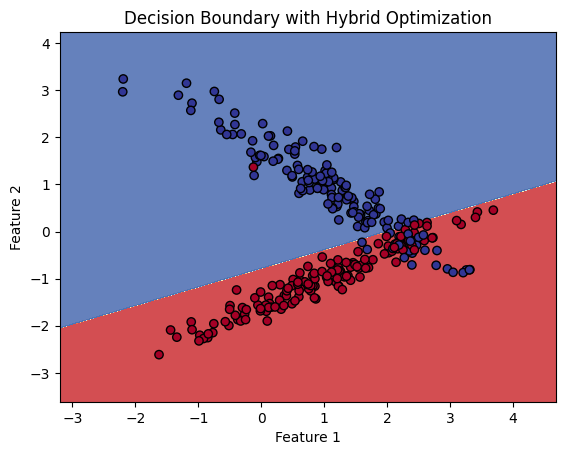

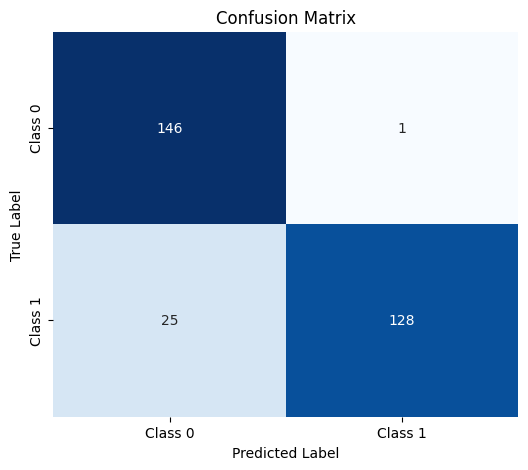

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.optimize import differential_evolution
import seaborn as sns
!pip install pyswarm
from pyswarm import pso

# Step 1: Create synthetic data
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Define objective function for hybrid optimization
def evaluate_sgd(params):
    alpha, tol = params
    model = SGDClassifier(alpha=alpha, tol=tol, random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return -accuracy_score(y_test, y_pred)  # Negative for minimization

# Bounds for hyperparameters
bounds = [(1e-5, 1e-2), (1e-5, 1e-1)]

# Step 3: Differential Evolution (DE) for global search
de_result = differential_evolution(evaluate_sgd, bounds, strategy='best1bin', maxiter=10, seed=42)

# Best parameters from DE
de_best_params = de_result.x

# Step 4: Particle Swarm Optimization (PSO) for local refinement
def pso_objective(params):
    return evaluate_sgd(params)

pso_best_params, _ = pso(
    pso_objective,
    lb=[max(de_best_params[0] - 0.001, 1e-5), max(de_best_params[1] - 0.01, 1e-5)],
    ub=[min(de_best_params[0] + 0.001, 1e-2), min(de_best_params[1] + 0.01, 1e-1)],
    swarmsize=20,
    maxiter=10
)

# Train the SGD classifier with optimized parameters
best_model = SGDClassifier(alpha=pso_best_params[0], tol=pso_best_params[1], random_state=42, max_iter=1000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Step 5: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Plot Decision Boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title("Decision Boundary with Hybrid Optimization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(best_model, X_test, y_test)

# Step 7: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Load dataset
df = pd.read_csv('/content/depression_data.csv')

# Check for missing values and drop them
df = df.dropna()

# Define target column
target_column = 'Chronic Medical Conditions'

# Ensure target variable exists
if target_column not in df.columns:
    raise KeyError(f"Column '{target_column}' not found in dataset. Check column names: {df.columns}")

# Extract target variable (y) and features (X)
y = df[target_column]
X = df.drop(columns=[target_column])

# Convert categorical variables (if any) into numerical form
X = pd.get_dummies(X)  # One-hot encoding for categorical features

# Split dataset into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
print("\nTraining XGBoost model...")
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(7, 6))

# Binarize target labels for multi-class ROC curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_prob = model.predict_proba(X_test)

for i in range(len(lb.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {lb.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
